# Estudio de ventas minoristas de moda 

## 📚 Librerias

In [65]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Para distribucion normal
from scipy.stats import shapiro, kstest, norm, normaltest
import scipy.stats as ss
import math

## 📄📥 Cargar el archivo

In [2]:
ruta="Fashion_Retail_Sales.xlsx"
df=pd.read_excel(ruta, engine='openpyxl')
df.head(6)

,Unnamed: 0,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,0,4018,Handbag,818.4,05-02-2023,NaN,Credit Card
1,1,4115,Tunic,NaN,11-07-2023,2.0,Credit Card
2,2,4019,Tank Top,463.8,23-03-2023,4.1,Cash
3,3,4097,Leggings,775.4,15-03-2023,3.2,Cash
4,4,3997,Wallet,444.2,27-11-2022,4.7,Cash
5,5,4080,Onesie,521.1,11-12-2022,4.5,Credit Card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3400 non-null   int64  
 1   Customer Reference ID  3400 non-null   int64  
 2   Item Purchased         3400 non-null   object 
 3   Purchase Amount (USD)  2750 non-null   float64
 4   Date Purchase          3400 non-null   object 
 5   Review Rating          3076 non-null   float64
 6   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 186.1+ KB


In [5]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    1770
Cash           1630
Name: count, dtype: int64

### 🔍 Eliminar datos Nulos NaN 

In [4]:
df.isnull().sum()

Unnamed: 0                 0
Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [6]:
df["Purchase Amount (USD)"].isna()
df["Purchase Amount (USD)"].isna().sum()

np.int64(650)

# Distribución Binomial

## 🎯 Resolver problema 1 

Calcula la probabilidad de exito (p) como la proporción de consumidores que realizaron la compra y
pagaron con efectivo (Cash)

### Identificar la columna que contiene el método de pago

In [7]:
print(df.columns)
print(df['Payment Method'].unique())

Index(['Unnamed: 0', 'Customer Reference ID', 'Item Purchased',
       'Purchase Amount (USD)', 'Date Purchase', 'Review Rating',
       'Payment Method'],
      dtype='object')
['Credit Card' 'Cash']


### Filtrar por método de pago 'Cash'

In [8]:
compras_cash = df[df['Payment Method'] == 'Cash']
cantidad_cash = compras_cash.shape[0]

### Obtener el total de consumidores

In [9]:
total_consumidores = df.shape[0]
total_consumidores

3400

### Calcular la probabilidad de éxito (p)

La probabilidad de éxito ($p$) se calcula como:

$
p = \frac{\text{Consumidores que pagaron en efectivo}}{\text{Total de consumidores}}
$

In [10]:
p = cantidad_cash / total_consumidores
print("Probabilidad de éxito (p) es:", round(p,2))

Probabilidad de éxito (p) es: 0.48


Este resultado indica la probabilidad de éxtio para usarlo en la distribcuión binomial

## 🎯 Resolver problema 2 

Supón que seleccionas al azar 45 consumidores. Utilizando el valor de la probabilidad p calculado,
modela la probabilidad de que exactamente k consumidores realicen una compra, para $k = 0; 1; ...; 45$.

**Sol:**

Sea
$X=$ Clientes pagan con Cash.

Se sabe que:
- Cada cliente es un intento independiente.
- La probabilidad de éxito (pagar con Cash) es
$p=0.49$
- Se atienden $n=45$ clientes

De lo anterior, se tiene que
$$
X\sim Binom(n=25,p=0.49)
$$



La sintaxis correcta de la función `binom.pmf(k, n, p)` es:

- `k`: número exacto de éxitos (clientes que pagan con efectivo).
- `n`: cantidad total de ensayos o intentos (clientes que seleccionas, aquí es 45).
- `p`: probabilidad de éxito (calculado previamente, en tu caso es `0.49`).

In [42]:
n=45
binomial=ss.binom.pmf(45,n,p)
print(f"P(X=45): {binomial}")

P(X=45): 4.284409082283554e-15


Para ver la probabilidad para distintos valores de $𝑘$:

In [43]:
for k in range(46):  # desde 0 hasta 25 clientes
    prob = ss.binom.pmf(k, n, p)
    print(f"P(X={k}): {prob}")

P(X=0): 1.7468102007414375e-13
P(X=1): 7.238899899682719e-12
P(X=2): 1.4665929401278103e-10
P(X=3): 1.9358474420632464e-09
P(X=4): 1.8718660435543707e-08
P(X=5): 1.4135232507428095e-07
P(X=6): 8.678127678759988e-07
P(X=7): 4.452530884090168e-06
P(X=8): 1.947667817517985e-05
P(X=9): 7.373750538261724e-05
P(X=10): 0.00024445857716677924
P(X=11): 0.0007163000424943356
P(X=12): 0.0018689900355478427
P(X=13): 0.00436909926171744
P(X=14): 0.009196618946375386
P(X=15): 0.017503019034288046
P(X=16): 0.030222373968103317
P(X=17): 0.04747795338890831
P(X=18): 0.06801298784274235
P(X=19): 0.08900539979063618
P(X=20): 0.10655505206573881
P(X=21): 0.11681782006130921
P(X=22): 0.11735780998455081
P(X=23): 0.10807527134170479
P(X=24): 0.09123303272866146
P(X=25): 0.07057416294468001
P(X=26): 0.04999386597124225
P(X=27): 0.03239820106987603
P(X=28): 0.019180048817396263
P(X=29): 0.010354162336451377
P(X=30): 0.005085434156961435
P(X=31): 0.0022660627872736904
P(X=32): 0.000912986454900876
P(X=33): 0.0

### 📊 Visualización

#### Crear rango de valores de éxitos (k)

$k$ Vas desde 0 hasta 25 éxitos posibles (consumidores que pagan con efectivo):


In [44]:
k = np.arange(0, n + 1)

#### Calcular la distribución de probabilidades

función ``binom.pmf()`` de SciPy para obtener la probabilidad para cada número de éxitos ($k$):

In [45]:
probabilidades = ss.binom.pmf(k, n, p)

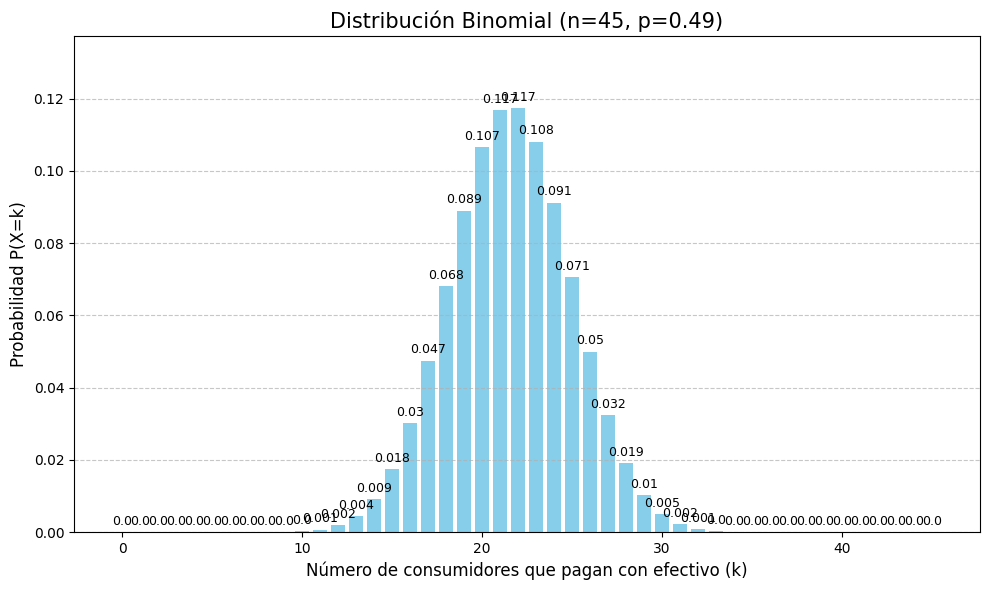

In [18]:
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.bar(k, probabilidades, color='skyblue', edgecolor='none')

# Etiquetas y títulos
plt.title(f'Distribución Binomial (n={n}, p=0.49)', fontsize=15)
plt.xlabel('Número de consumidores que pagan con efectivo (k)', fontsize=12)
plt.ylabel('Probabilidad P(X=k)', fontsize=12)

# Mostrar los valores en cada barra
for i in range(len(k)):
    plt.text(k[i], probabilidades[i] + 0.002, round(probabilidades[i], 3),
             ha='center', fontsize=9)

# Límites del eje Y
plt.ylim(0, max(probabilidades) + 0.02)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


## 🎯 Resolver problema 3 

Interpreta los resultados de la gráfica, cuales son los valores más probables para $k$? Qué indica
esto sobre los metodos de pago de las compras realizada por consumidores?

- **Media (esperanza):** $\mu = n \cdot p$
- **Varianza:** $\sigma^2 = n \cdot p \cdot (1 - p)$

Para una variable aleatoria que se distribuye binomial, se definen la esperanza y la varianza como
$$
E(X) = n\cdot p ;\qquad V(X) = n \cdot p \cdot (1-p)
$$
donde $n$ corresponde al tamaño de la muestra, y $p$ a la probabilidad de éxito de la variable aleatoria

In [46]:
E=n*p
print(f"El valor de la esperanza es {round(E,2)}")

El valor de la esperanza es 21.57


Los valores más probables para el número de consumidores que pagan en efectivo (k) estarán cercanos a 12 y 13 consumidores.

In [47]:
probabilidades_E = ss.binom.pmf(round(E,0), n, p)
print(f"P(X={round(E,0)}): {round(probabilidades_E,3)}")


P(X=22.0): 0.117


### 📊 Visualización

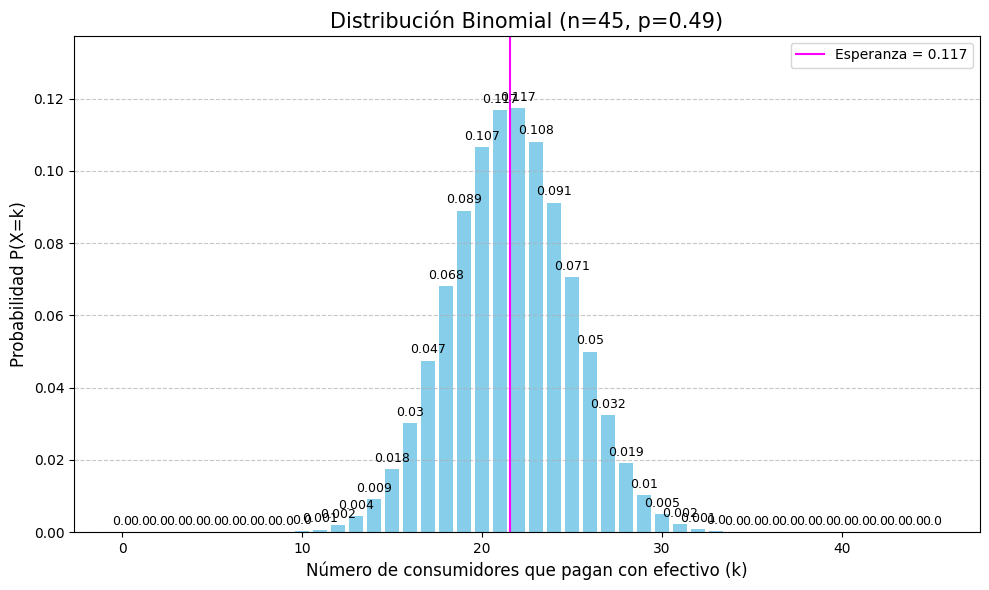

In [25]:
k = np.arange(0, n + 1)
probabilidades = ss.binom.pmf(k, n, p)

plt.figure(figsize=(10, 6))
# Gráfico de barras
plt.bar(k, probabilidades, color='skyblue', edgecolor='none')
# Etiquetas y títulos
plt.title(f'Distribución Binomial (n={n}, p=0.49)', fontsize=15)
plt.xlabel('Número de consumidores que pagan con efectivo (k)', fontsize=12)
plt.ylabel('Probabilidad P(X=k)', fontsize=12)
# Mostrar los valores en cada barra
for i in range(len(k)):
    plt.text(k[i], probabilidades[i] + 0.002, round(probabilidades[i], 3),
             ha='center', fontsize=9)
# Límites del eje Y
plt.ylim(0, max(probabilidades) + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#Linea de la Esperanza
plt.axvline(E,color='magenta',label=f'Esperanza = {round(probabilidades_E,3)}') # plt.axhline= linea horizontal, plt.axvline= linea vertical
# Mostrar gráfico
plt.legend()
plt.show()

### 📈 **¿Qué implica esto sobre los métodos de pago?**

Esta interpretación nos dice algo importante sobre los métodos de pago de las compras realizadas por los consumidores:

- **Aproximadamente la mitad de los consumidores** (alrededor del **49%**) utiliza efectivo como método de pago, según el análisis.
- Cuando se selecciona al azar un grupo de 45 consumidores, lo más probable es que cerca de **22 o 23 consumidores** paguen con efectivo.
- Valores muy altos (cercanos a 45) o muy bajos (cercanos a 0) son **poco probables**, indicando que sería extraño que casi todos o casi ningún consumidor pague con efectivo.

---

### **Conclusión práctica**

- **El método de pago con efectivo está presente significativamente en casi la mitad de las transacciones**.
- Esta información sugiere mantener facilidades adecuadas para pagos en efectivo debido a su relevancia constante.
- Esta distribución ayuda a entender claramente cómo varían estos resultados si se repite muchas veces la selección de grupos de consumidores.

# Distribución Normal

Se sospecha que el precio de la compra del articulo, se distribuye aproximadamente normal. Con el fin de
verificar esto, se considera lo siguiente:

## 🎯 Resolver problema 1 

Determina los parametros que definen la distribución normal de este conjunto de datos (media y
desviación estandar).

Generar los datos de la columna en una variable

In [91]:
data=df['Purchase Amount (USD)'].dropna()

### Con valores negativos

In [49]:
data.describe()

count    2750.000000
mean      820.000727
std       241.112214
min        36.100000
25%       652.475000
50%       821.000000
75%       988.875000
max      1605.700000
Name: Purchase Amount (USD), dtype: float64

In [60]:
media=df['Purchase Amount (USD)'].mean()
std=df['Purchase Amount (USD)'].std()
print(f"La media de los datos es {round(media,2)} y la desviacion estandar {round(std,2)}")

La media de los datos es 820.0 y la desviacion estandar 241.11


### Sin valores negativos

In [76]:
# 1) Filtra y selecciona solo la columna numérica

m = df.loc[df['Purchase Amount (USD)'] > 0, 'Purchase Amount (USD)'].mean()
s = df.loc[df['Purchase Amount (USD)'] > 0, 'Purchase Amount (USD)'].std()

# 2) Imprime usando las mismas variables y formato redondeado
print(f"La media de los datos es {m:.2f} y la desviación estándar es {s:.2f}")


La media de los datos es 820.00 y la desviación estándar es 241.11


## 🎯 Resolver problema 2

Realiza un histograma del conjunto de datos y sobre el, grafica la curva de la distribucion normal
teorica correspondiente a los parametros obtenidos.

### Con valores negativos

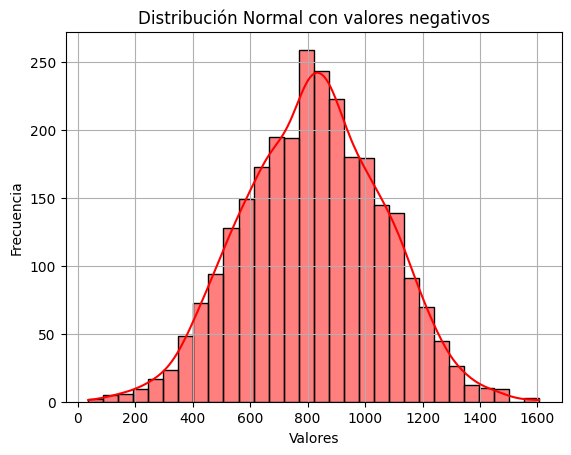

In [86]:
sns.histplot(data, bins=30, kde=True, color="red")
plt.title("Distribución Normal con valores negativos")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

## 🎯 Resolver problema 3

Analiza si el conjunto de datos parece ajustarse bien a una distribucion normal, considerando:
- La simetria del histograma respecto a la media.
- La concentracion de los datos alrededor de la media.
- La presencia o ausencia de valores atipicos.

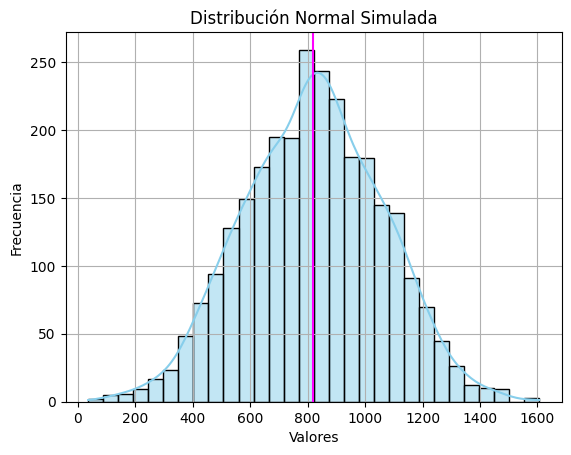

In [87]:
sns.histplot(data, bins=30, kde=True, color="skyblue")
plt.title("Distribución Normal Simulada")
plt.xlabel("Valores")
plt.axvline(media,color='magenta',label=f'Media = {round(probabilidades_E,3)}') # plt.axhline= linea horizontal, plt.axvline= linea vertical
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [92]:
mu, sigma = norm.fit(data)  # Ajuste de la normal
print(f"Media ajustada (mu): {mu:.2f}")
print(f"Desviación estándar ajustada (sigma): {sigma:.2f}")

Media ajustada (mu): 820.00
Desviación estándar ajustada (sigma): 241.07


### 📌 Graficar histograma y curva de distribución normal ajustada

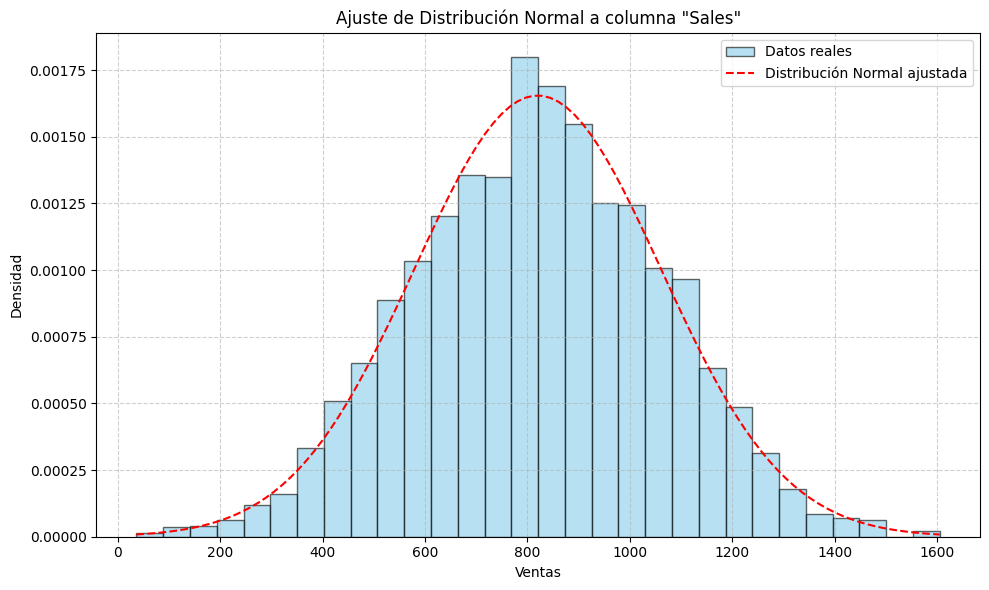

In [98]:
# Crear puntos en el eje X para la curva
x = np.linspace(data.min(), data.max(), 100)
pdf = norm.pdf(x, mu, sigma)  # Función de densidad de probabilidad

# Gráfico
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Datos reales')
plt.plot(x, pdf, 'r--', label='Distribución Normal ajustada')
plt.title('Ajuste de Distribución Normal a columna "Sales"')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🧪 Test de normalidad (Shapiro-Wilk)

In [99]:
stat, p = shapiro(data)
print("Estadístico:", round(stat,2))
print("Valor p:", round(p,2))

if p > 0.05:
    print("✅ Los datos parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("❌ Los datos NO parecen seguir una distribución normal (se rechaza H0).")

Estadístico: 1.0
Valor p: 0.27
✅ Los datos parecen seguir una distribución normal (no se rechaza H0).


📌 **Interpretación de los Tests de Normalidad**

- **Hipótesis nula (H₀):** Los datos siguen una distribución normal.

- Si $ p > 0.05 $, no se rechaza H₀ → ✅ **Los datos se consideran normales**.

- Si $ p \leq 0.05 $, se rechaza H₀ → ❌ **Los datos no siguen una distribución normal**.

### 🧪 Test de D’Agostino’s K² test

In [100]:
stat, p = normaltest(data)

if p > 0.05:
    print("✅ Los datos parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("❌ Los datos NO parecen seguir una distribución normal (se rechaza H0).")
    
print(f"D’Agostino test - Estadístico: {stat:.3f}, p-valor: {p:.3f}")

✅ Los datos parecen seguir una distribución normal (no se rechaza H0).
D’Agostino test - Estadístico: 4.175, p-valor: 0.124


Según la prueba de D’Agostino y Pearson (p = 0.124), no se encontró evidencia suficiente para rechazar la hipótesis de normalidad. Por lo tanto, se asume que la variable analizada sigue una distribución aproximadamente normal.

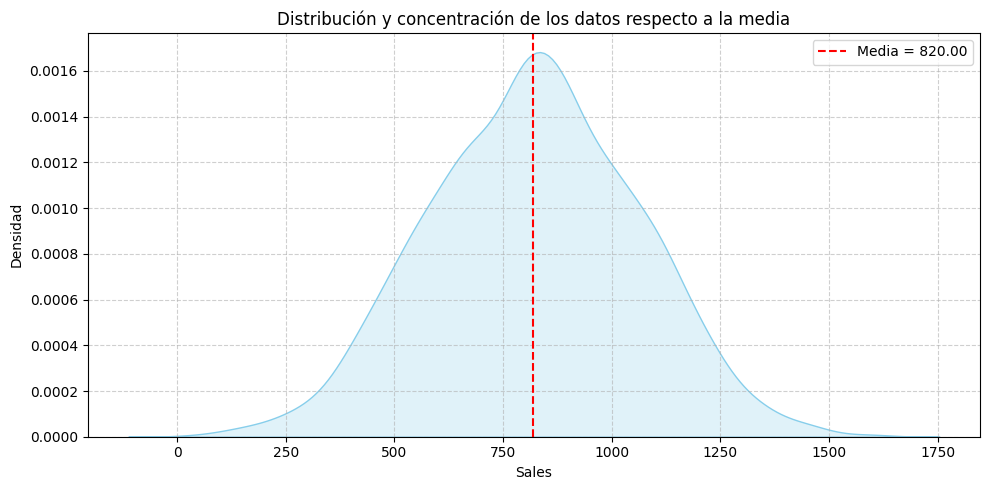

In [101]:
plt.figure(figsize=(10,5))
sns.kdeplot(data, fill=True, color='skyblue') #Grafico KDE
plt.axvline(media, color='red', linestyle='--', label=f'Media = {media:.2f}')
plt.title('Distribución y concentración de los datos respecto a la media')
plt.xlabel('Sales')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 📊 **Análisis del KDE (Kernel Density Estimation) y sus implicancias**

#### **Observaciones del gráfico**

1. **Media ≈ 820.0** está marcada con una **línea roja punteada vertical**.
2. La **curva KDE es unimodal** (tiene un solo pico).
3. La curva es **bastante simétrica**, pero tiene una **cola más larga hacia la derecha** (ligeramente sesgada positivamente).
4. No hay evidencia visual de bimodalidad ni de colas pesadas extremas.

#### ✅ **Conclusiones clave**

| Observación | Interpretación |
|-------------|----------------|
| 🎯 **Forma de campana** | Los datos se distribuyen de forma parecida a una **distribución normal**. Esto sugiere que muchos valores están **concentrados cerca de la media**. |
| ➕ **Ligeramente sesgada a la derecha** | Hay **algunos valores altos** (ventas grandes) que extienden la cola derecha. Esto indica una **asimetría positiva leve**. |
| 🧠 **Media representativa** | La media es un buen resumen central de los datos porque no hay sesgos severos. |
| 🟦 **Alta densidad alrededor de la media** | Significa que una **gran proporción de datos está cerca del promedio**, lo que implica **baja dispersión relativa**. |
| 🧪 **Pruebas de Ajuste** | En ambas pruebas, Shapiro-Wilk y D’Agostino’s K² test no se rechaza H0 |

#### 📌 Conclusión

1. **Se puede asumir normalidad** para muchas técnicas estadísticas (se confirma con una prueba como Shapiro-Wilk y D'Agostino).
2. Lo que se podria hacer:
   - Aplicar modelos paramétricos (regresión lineal, pruebas t).
   - Usar la media y desviación estándar como medidas representativas.
3. **Monitorear los valores altos** (cola derecha) por si representan casos especiales (clientes VIP, promociones, etc.).

> “La distribución de las ventas muestra un comportamiento aproximadamente normal, con una leve asimetría positiva. La mayoría de los valores se agrupan alrededor de la media (~280.8), lo que indica una concentración importante de datos cercanos al promedio. Esto sugiere baja dispersión relativa y permite aplicar métodos estadísticos basados en la normalidad.”

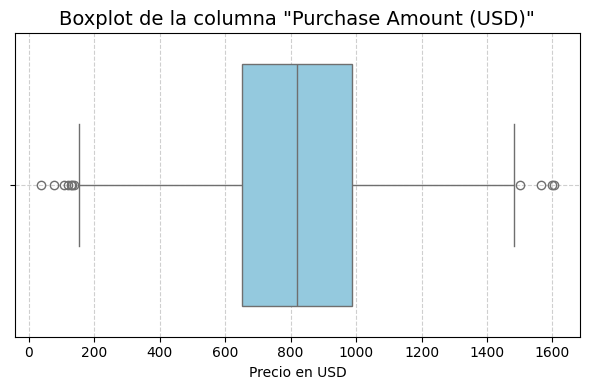

In [102]:
fig=plt.figure(figsize=(6,4))
sns.boxplot(x=data,color='skyblue')

# Detalles visuales
plt.title('Boxplot de la columna "Purchase Amount (USD)"', fontsize=14)
plt.xlabel('Precio en USD')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 📊 **Análisis del Boxplot**

#### ✅ **Conclusiones del gráfico**

| Observación | Interpretación |
|-------------|----------------|
| ⚠️ Hay **varios puntos fuera de los bigotes**, tanto a la izquierda como a la derecha. | Esto indica la **presencia clara de valores atípicos**, tanto **muy bajos** (incluso negativos) como **muy altos**. |
| 📈 **Los bigotes son largos y simétricos**, pero los extremos tienen puntos individuales alejados. | Implica que la mayoría de los datos están concentrados, pero **algunos clientes hicieron compras anómalamente baratas o caras**. |
| 🔴 **Valor negativo** (cerca de -200) es sospechoso. | Podría ser un **error de captura de datos**, ya que en contexto real un monto de compra negativo no tiene sentido. |

---

#### **Implicancias para el análisis de datos**

- **Hay que revisar los outliers** antes de aplicar modelos estadísticos o entrenar modelos de machine learning.
- Puedes usar métodos como:
  - **Eliminación o winsorización** de outliers.
  - **Transformaciones logarítmicas** si hay sesgo extremo.
  - Aplicar pruebas como IQR, Z-score o `IsolationForest` para tratarlos.


> "El análisis visual mediante boxplot muestra la presencia de valores atípicos tanto por debajo como por encima del rango intercuartílico. Se observa un caso extremo negativo que podría corresponder a un error de captura. Se recomienda investigar estos puntos antes de continuar con análisis descriptivos o modelos predictivos."

## 🎯 Resolver problema 4

Calcula y reporta el porcentaje de datos que se encuentra dentro de una desviacion estandar respecto a la media, y comparalo con el valor teorico esperado para una distribucion normal. El modelo normal parece adecuado?

1. Calcular el porcentaje de valores dentro del rango:
   $
   \mu - \sigma \leq x \leq \mu + \sigma
   $

2. Compararlo con el valor teórico para una distribución normal (≈68.27%).

3. Evaluar si la **distribución observada es razonablemente normal**.

In [105]:
# Definir límites
limite_inferior = media - std
limite_superior = media + std

# Filtrar datos dentro del rango [μ - σ, μ + σ]
dentro_de_rango = data[(data >= limite_inferior) & (data <= limite_superior)]

# Calcular porcentaje
porcentaje_observado = (len(dentro_de_rango) / len(data)) * 100

# Mostrar resultados
print(f"Media: {media:.2f}")
print(f"Desviación estándar: {std:.2f}")
print(f"Rango: [{limite_inferior:.2f}, {limite_superior:.2f}]")
print(f"Porcentaje de datos dentro de 1 desviación estándar: {porcentaje_observado:.2f}%")
print("Porcentaje esperado para una distribución normal: 68.27%")

# Evaluación
if abs(porcentaje_observado - 68.27) <= 5:
    print("✅ El modelo normal parece adecuado (diferencia aceptable).")
else:
    print("⚠️ La distribución observada se aleja del modelo normal.")

Media: 820.00
Desviación estándar: 241.11
Rango: [578.89, 1061.11]
Porcentaje de datos dentro de 1 desviación estándar: 66.44%
Porcentaje esperado para una distribución normal: 68.27%
✅ El modelo normal parece adecuado (diferencia aceptable).


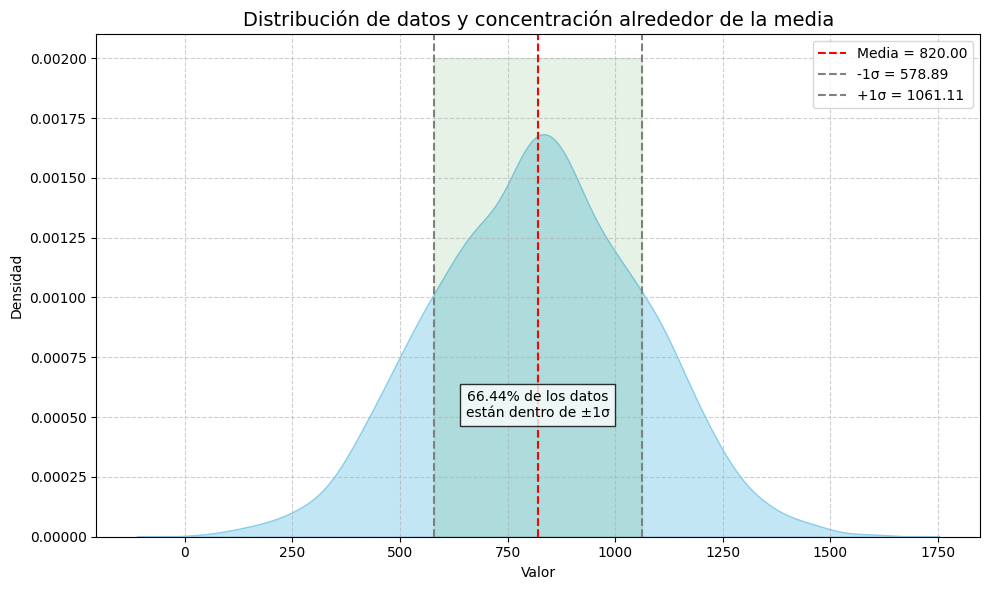

In [106]:
# Crear gráfico
plt.figure(figsize=(10, 6))
sns.kdeplot(data, fill=True, color='skyblue', alpha=0.5)

# Línea de la media
plt.axvline(media, color='red', linestyle='--', label=f'Media = {media:.2f}')

# Líneas de ±1 desviación estándar
plt.axvline(limite_inferior, color='gray', linestyle='--', label=f'-1σ = {limite_inferior:.2f}')
plt.axvline(limite_superior, color='gray', linestyle='--', label=f'+1σ = {limite_superior:.2f}')

# Sombrear el área entre -1σ y +1σ
plt.fill_betweenx([0, 0.002], limite_inferior, limite_superior, color='green', alpha=0.1)

# Anotar el porcentaje observado
plt.text(media, 0.0005, f"{porcentaje_observado:.2f}% de los datos\nestán dentro de ±1σ", 
         ha='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.8))

# Títulos
plt.title('Distribución de datos y concentración alrededor de la media', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 📌 Interpretación esperada


| Rango respecto a la media | % esperado (normal) | ¿Qué representa?                             |
|---------------------------|----------------------|----------------------------------------------|
| ±1σ                       | **68.27%**           | Rango más frecuente de los datos             |
| ±2σ                       | 95.45%               | Casi todos los datos                         |
| ±3σ                       | 99.73%               | Prácticamente todos los datos (regla empírica)|

### 📊 Interpretación de los resultados

| Resultado                           | ¿Qué significa? |
|-------------------------------------|------------------|
| **Media: 500.80**                   | El valor promedio de la columna. |
| **Desviación estándar: 209.92**     | Mide cuánto se dispersan los datos respecto a la media. |
| **Rango [290.88, 710.72]**          | Los valores que están a **±1σ** (una desviación estándar) de la media. |
| **Porcentaje de datos dentro del rango: 69.53%** | El **69.53% de los datos reales** cae dentro del rango \[μ − σ, μ + σ\]. |
| **Valor esperado para normalidad: 68.27%** | Lo que se **espera teóricamente** en una distribución normal. |
| ✅ **Conclusión:** | Como la diferencia es pequeña (69.53% vs 68.27%), es **razonable asumir que los datos siguen una distribución normal**. |


# Intervalo de confianza

In [52]:
df_filtrado = df[df['Payment Method'] == 'Credit Card']

In [53]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 510
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             263 non-null    int64  
 1   Customer Reference ID  263 non-null    int64  
 2   Item Purchased         263 non-null    object 
 3   Purchase Amount (USD)  263 non-null    float64
 4   Date Purchase          263 non-null    object 
 5   Review Rating          233 non-null    float64
 6   Payment Method         263 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 16.4+ KB


## 🎯 Resolver problema 1 

Calcula la media muestral y la desviacion estandar del precio de compra (Purchase Amount), correspondientes a las compras que fueron realizadas con este medio

In [54]:
data=df_filtrado['Purchase Amount (USD)']

In [55]:
media=data.mean()
print(f"La media muestral es {round(media,2)} y la desviacion estandar ")


La media muestral es 502.88 y la desviacion estandar 


In [56]:
mu, sigma = data.mean(),data.std()  # Ajuste de la normal
print(f"Media muestral (mu): {mu:.2f}")
print(f"Desviación estándar ajustada (sigma): {sigma:.2f}")

Media muestral (mu): 502.88
Desviación estándar ajustada (sigma): 212.08


## 🎯 Resolver problema 2

Determina el intervalo de confianza para la media poblacional al 95% de nivel de confianza, considerando
que se desconoce la desviacion estandar poblacional e interpretar este resultado en el
contexto de las ventas.

$
IC = \bar{x} \pm t_{\alpha/2, \, df} \cdot \frac{s}{\sqrt{n}}
$

Donde:
- $\bar{x}$: media muestral.
- $s$: desviación estándar muestral.
- $n$: tamaño de la muestra.
- $t_{\alpha/2, df}$: valor crítico de $t$ con $df = n - 1$ grados de libertad.

In [57]:
# Parámetros de la muestra
media_muestral = data.mean()
desv_est_muestral = data.std(ddof=1)  # ddof=1 para usar muestra
n = len(data)
grados_libertad = n - 1

# Nivel de confianza
confianza = 0.95
alpha = 1 - confianza

# t crítico para el intervalo de confianza
t_critico = ss.t.ppf(1 - alpha/2, grados_libertad)

# Error estándar
error_std = desv_est_muestral / np.sqrt(n)

# Intervalo de confianza
lim_inferior = media_muestral - t_critico * error_std
lim_superior = media_muestral + t_critico * error_std

# Mostrar resultados
print(f"Media muestral: {media_muestral:.2f}")
print(f"Intervalo de confianza al 95%: [{lim_inferior:.2f}, {lim_superior:.2f}]")


Media muestral: 502.88
Intervalo de confianza al 95%: [477.13, 528.63]


### Desglose conceptual:

| Elemento                            | Significado |
|-------------------------------------|-------------|
| **Media muestral = 502.88**         | Es el **promedio de ventas** observado en tu muestra. |
| **[477.13, 528.63]**                | Es el **rango estimado** donde probablemente se encuentra la verdadera media de todas las ventas, con un 95% de certeza. |
| **Uso de distribución t**           | Se usa porque **no se conoce la desviación estándar poblacional**, y se estima desde la muestra. |


### Conclusión

> Este intervalo sugiere que el promedio real de gasto por compra de los clientes se encuentra entre $477 y $528. Esta información es útil para establecer políticas de precios, detectar cambios de comportamiento del consumidor, o establecer objetivos de ventas promedio por cliente.

Este tipo de análisis es clave para:

- Hacer **proyecciones de ingresos** con márgenes de error razonables.
- Comparar segmentos: ¿los clientes del segmento A tienen mayor media que los del segmento B?
- Estimar el comportamiento de mercado sin conocer toda la población.

### 📊 Graficar IC

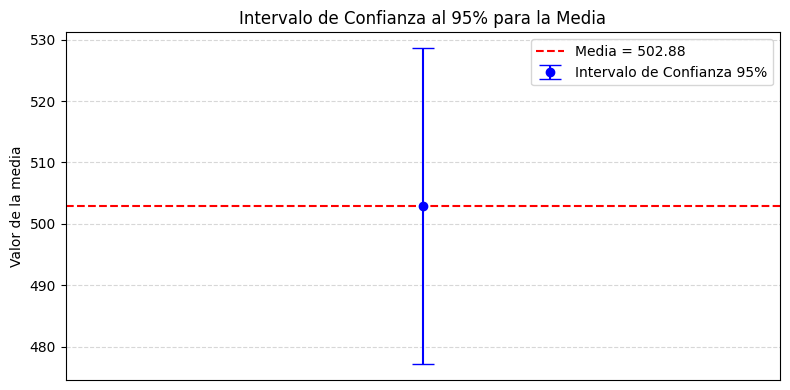

In [58]:
plt.figure(figsize=(8, 4))

# Graficar la media como un punto y el intervalo como barra de error
plt.errorbar(x=1, y=media, yerr=t_critico*error_std, fmt='o', color='blue',
             capsize=8, label='Intervalo de Confianza 95%')

# Estética del gráfico
plt.axhline(media, color='red', linestyle='--', label=f'Media = {media:.2f}')
plt.xlim(0, 2)
plt.xticks([])
plt.ylabel('Valor de la media')
plt.title('Intervalo de Confianza al 95% para la Media')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 📊 Graficar IC en el KDE

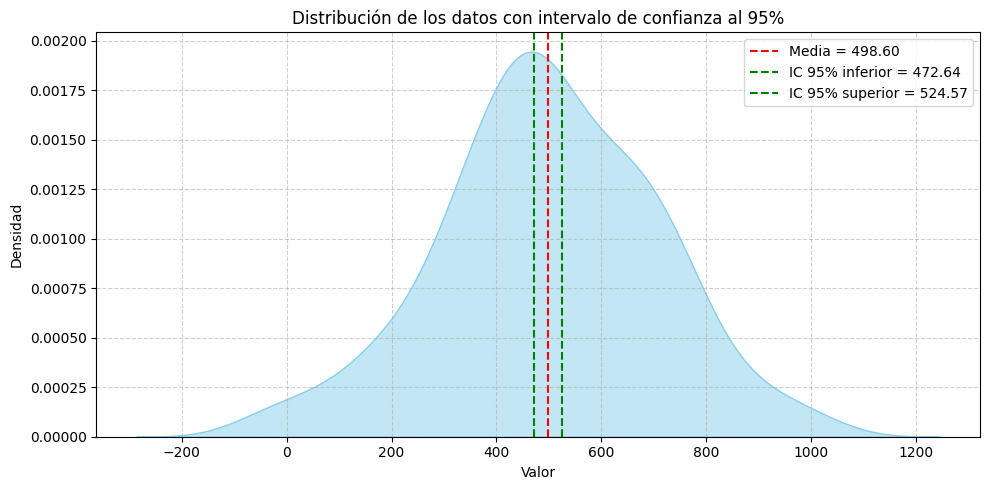

In [39]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data, fill=True, color='skyblue', alpha=0.5)
plt.axvline(media, color='red', linestyle='--', label=f'Media = {media:.2f}')
plt.axvline(lim_inferior, color='green', linestyle='--', label=f'IC 95% inferior = {lim_inferior:.2f}')
plt.axvline(lim_superior, color='green', linestyle='--', label=f'IC 95% superior = {lim_superior:.2f}')
plt.title('Distribución de los datos con intervalo de confianza al 95%')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 🎯 Resolver problema 3

Calcular un intervalo de confianza, para la proporción de las compras que fueron hechas con tarjeta de crédito e interpreta su resultado en el contexto de las ventas

Calcular un **intervalo de confianza al 95% para la proporción de compras pagadas con efectivo**, utilizando los datos de una muestra, y luego **interpretar el resultado en el contexto de las ventas**.

Un intervalo de confianza (IC) nos permite **estimar un rango de valores** donde **probablemente se encuentre la proporción real de toda la población**, a partir de una muestra.

$
IC = \hat{p} \pm Z_{\alpha/2} \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$

- $ \hat{p} $: proporción observada en la muestra.
- $ Z_{\alpha/2} $: valor crítico de la distribución normal estándar (para 95%, es 1.96).
- $ n $: tamaño de la muestra.
- El término a la derecha es el **margen de error**.

### Volviendo al DataFrame bruto

In [41]:
df.head(6)

,Unnamed: 0,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,0,4018,Handbag,559.0,05-02-2023,NaN,Credit Card
1,1,4115,Tunic,733.7,11-07-2023,2.0,Credit Card
2,2,4019,Tank Top,639.9,23-03-2023,4.1,Cash
3,3,4097,Leggings,213.1,15-03-2023,3.2,Cash
4,4,3997,Wallet,731.3,27-11-2022,4.7,Cash
5,5,4080,Onesie,748.5,11-12-2022,4.5,Credit Card


In [45]:
# Contar total de observaciones
n_total = len(df)

# Contar compras en efectivo
n_cash = len(df[df['Payment Method'] == 'Credit Card'])

# Calcular proporción muestral
p_hat = n_cash / n_total
print(f"La proporción observada en la muestra (p) es de {round(p_hat,2)}")

La proporción observada en la muestra (p) es de 0.51


### Calcular el IC

In [49]:
# Nivel de confianza del 95%
z_crit = norm.ppf(0.975)  # 1 - alpha/2 para 95%

# Error estándar de la proporción
error_std = np.sqrt(p_hat * (1 - p_hat) / n_total)

# Intervalo de confianza
lim_inferior = p_hat - z_crit * error_std
lim_superior = p_hat + z_crit * error_std

# Mostrar resultados
print(f"Proporción muestral de pagos con tarjeta de credito: {p_hat:.3f}")
print(f"Intervalo de confianza al 95%: [{lim_inferior:.3f}, {lim_superior:.3f}]")

Proporción muestral de pagos con tarjeta de credito: 0.514
Intervalo de confianza al 95%: [0.470, 0.557]


### Interpretación de resultados

| Elemento                                 | Significado |
|------------------------------------------|-------------|
| **0.514** (51.4%)                        | Es la proporción **observada en tu muestra**: 514 de cada 1000 compras (por ejemplo) fueron pagadas con tarjeta de credito. |
| **[0.470, 0.557]**                        | Es el **rango estimado** donde se encuentra la **proporción verdadera** de todas las compras pagadas con tarjeta de credito, con un **95% de confianza**. |
| **Nivel de confianza: 95%**              | Significa que si repitieras este muestreo muchas veces, **95 de cada 100 intervalos** construidos de la misma manera incluirían la proporción real \( p \). |

> “Se estima que aproximadamente el **51.4% de las compras fueron pagadas con Tarjeta de credito**. Con un **nivel de confianza del 95%**, se espera que la **proporción verdadera** de pagos con tarjeta de credito en toda la población de ventas se encuentre entre el **47.0% y el 55.7%**.”